<a href="https://colab.research.google.com/github/lomerrod/proyectofinalDS2/blob/main/ProyectoParteIII%2BRodriguezLorena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🪵🔥 PROYECTO EMPRESA DE VENTA DE LEÑA A HOGARES Y COMERCIOS 🚚🏠**

##**📌 0- Introducción y Definición del Problema**

###*0.1 Contexto*

La industria de distribución de leña juega un rol fundamental en el abastecimiento energético de hogares y comercios, especialmente en zonas donde la leña continúa siendo una fuente accesible de calefacción y cocina. En este contexto, las empresas proveedoras deben tomar decisiones estratégicas basadas en datos para mantenerse competitivas y rentables. Uno de los desafíos más importantes es anticipar la fuga de clientes, es decir, detectar aquellos clientes que dejan de comprar sin previo aviso.

###*0.2 Introducción*

La empresa analizada se dedica a la venta y distribución de leña, con una base de clientes compuesta tanto por consumidores residenciales como por comercios. Para abordar la problemática de la fuga de clientes, se dispone de un conjunto de datos históricos operativos que permite analizar el comportamiento de los usuarios y su interacción con la empresa.

Dicho conjunto incluye:

🧾 Datos de ventas y facturación

📦 Detalles de los productos vendidos

👤 Datos generales de clientes

📋 Resultados de encuestas de satisfacción

⚠️ Registros de reclamos realizados

💰 Información sobre deudas y morosidad

El análisis de estos datos permite no solo comprender mejor el comportamiento de los clientes, sino también desarrollar un modelo predictivo basado en técnicas de Machine Learning. Dicho modelo podrá anticipar la fuga de clientes, permitiendo a la empresa tomar medidas preventivas de fidelización y mejora del servicio.

###*0.3 Objetivo*

El objetivo principal de este proyecto es predecir la fuga de clientes, definida como la ausencia de compras en los últimos seis meses, utilizando algoritmos de aprendizaje automático. A partir de esta predicción, la empresa podrá implementar estrategias de retención personalizadas, optimizar sus recursos comerciales y mantener una relación sólida con su base de clientes.

###*0.4 Preguntas e hipótesis de interés*

Pregunta 1:
¿Existe una relación entre la frecuencia de compras y el monto total gastado con la probabilidad de fuga?

Hipótesis 1:
Los clientes que compran con menor frecuencia y gastan menos tienen mayor probabilidad de abandonar la empresa.

---

Pregunta 2:
¿Los reclamos realizados por los clientes influyen en la probabilidad de que dejen de comprar?

Hipótesis 2:
Los clientes que presentan reclamos tienen una mayor tendencia a fugarse que aquellos que no los realizan.


---


Pregunta 3:
¿El nivel de satisfacción reportado (ya sea por encuestas o resolución de reclamos) se relaciona con la retención?

Hipótesis 3:
Clientes más satisfechos tienen una menor tasa de fuga.

##**🗂️ 1- Preparación de la información**

###*1.1 Librerías*

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

###*1.2 Carga de los datasets*

In [2]:
# URL del archivo Excel en formato raw
file_url = "https://raw.githubusercontent.com/lomerrod/proyectofinalDS2/main/data.xlsx"

# Cargar el archivo
xls = pd.ExcelFile(file_url)

# Verificar los nombres de las hojas
print(xls.sheet_names)

['ventas', 'ventas_detalle', 'productos', 'cliente', 'encuesta2024', 'nc', 'deuda']


In [3]:
# Cargar las hojas
df_ventas = xls.parse('ventas')
df_ventas_detalle = xls.parse('ventas_detalle')
df_productos = xls.parse('productos')
df_cliente = xls.parse('cliente')
df_encuesta2024 = xls.parse('encuesta2024')
df_reclamos2024 = xls.parse('nc')
df_deuda = xls.parse('deuda')

##**🔍 2- Primera aproximación a los datasets**

###*2.1 Ver las primeras filas*

In [4]:
df_ventas.head()

,FECHA DE FACTURACION,DOCUMENTO,COMPROBANTE,CLIENTE,TOTAL,FECHA DE ENTREGA,CHOFER
0,2022-01-01,FACTURA,32595,0012585,7950.0,2022-09-29,GASTON
1,2022-01-01,NOTA DE CREDITO,6584,0010141,-9528.0,2021-12-17,SANDOVAL
2,2022-01-01,NOTA DE CREDITO,11348,0012585,-7950.0,2022-07-23,GASTON
3,2022-01-03,FACTURA,25413,0009049,4950.0,2022-01-03,NICOLAS
4,2022-01-04,FACTURA,25457,0012253,3795.0,2022-01-04,NICOLAS


In [5]:
df_ventas_detalle.head()

,COMPROBANTE,CODIGO_PRODUCTO,CANTIDAD
0,32595,AS0004,1.0
1,6584,CO0027,-0.7
2,6584,AS0004,-0.3
3,11348,AS0004,-1.0
4,25413,AS0004,0.9


In [6]:
df_productos.head()

,CODIGO_PRODUCTO,PRODUCTO,UNIDAD,FAMILIA
0,AS0002,ASTILLA CALEFACCION CHICA,TON,AST
1,AS0003,ASTILLA CALEFACTOR,TON,AST
2,AS0004,ASTILLA ESTUFA,TON,AST
3,AS0005,ASTILLA GRANDE,TON,AST
4,AS0006,ASTILLON CHICO,TON,AST


In [7]:
df_cliente.head()

,CLIENTE,CLIENTE_NOMBRE,INGRESO,ZONA,TIPO DE VENTA,MEDIO,SEGMENTADOR
0,0000000,REPARTO,00:00:00,NaN,REPARTO,NaN,NaN
1,0000001,MOSTRADOR,00:00:00,NaN,MOSTRADOR,NaN,NaN
2,0000002,ARANCIBIA GONZALO,00:00:00,CARRASCO NORTE,REPARTO,NaN,CLIENTE DE REPARTO COMUN
3,0000003,ARANCIBIA BERNARDO (TATO),00:00:00,POCITOS,REPARTO,NaN,CLIENTE DE REPARTO COMUN
4,0000012,JORAJURIA GABRIELA,00:00:00,CARRASCO,REPARTO,NaN,CLIENTE DE REPARTO COMUN


In [8]:
df_encuesta2024.head()

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,Si,Búsqueda en internet,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,Si,Visita a nuestras instalaciones (oficina o dep...,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,Si,Búsqueda en internet,Servicio telefónico y del personal,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01


In [9]:
df_reclamos2024.head()

,Fecha de entrega,Fecha de reclamo,CLIENTE,CHOFER,Reclamo,Tipo de error,Nivel de disconformidad,Área afectada,Categoría,Visita Realizada,Medidas a tomar,Responsable,Fecha de cierre,Satisfaccion
0,2024-01-04,2024-01-08,11040,Tapia,NC,Error del proceso,Medio,Logística,Condiciones de entrega,No,Pedido adecuado en próxima entrega,LB,2024-01-08 00:00:00,Satisfecho
1,2024-01-08,2024-01-11,12141,Tapia,Reclamo que N/A,Error del proceso,Leve,Producción,Tipo de leña,No,No aplica,LB,2024-01-11 00:00:00,Satisfecho
2,2024-01-08,2024-01-15,13060,Nicolas,Sugerencia,Error del proceso,Medio,Producción,Tamaño de la leña,No,Leña adecuada en próximo pedido,IP,2024-01-18 00:00:00,Muy satisfecho
3,2024-01-08,2024-01-15,12526,Nicolas,NC,Error del proceso,Medio,Producción,Calidad de la leña,No,Regalo de leña Serrana,FP,2024-02-20 00:00:00,Satisfecho
4,2024-01-19,2024-01-19,12141,Tapia,NC,Error del proceso,Medio,Comercial,Tamaño de la leña,No,Nota de crédito,FP,2024-01-22 00:00:00,Muy satisfecho


In [10]:
df_deuda.head()

,CLIENTE,monto_deuda,dias_vencido
0,3831,8459,15
1,4966,14565,15
2,5342,12524,15
3,5582,21698,15
4,5752,7109,15


###*2.2 Información general de columnas y tipos de datos*

In [11]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17595 entries, 0 to 17594
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FECHA DE FACTURACION  17595 non-null  datetime64[ns]
 1   DOCUMENTO             17595 non-null  object        
 2   COMPROBANTE           17595 non-null  int64         
 3   CLIENTE               17595 non-null  object        
 4   TOTAL                 17595 non-null  float64       
 5   FECHA DE ENTREGA      17595 non-null  datetime64[ns]
 6   CHOFER                17595 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 962.4+ KB


In [12]:
df_ventas.shape

(17595, 7)

Tenemos 17595 filas y 8 columnas para el *dataframe de ventas*

In [13]:
df_ventas_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMPROBANTE      31428 non-null  int64  
 1   CODIGO_PRODUCTO  31428 non-null  object 
 2   CANTIDAD         31428 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 736.7+ KB


In [14]:
df_ventas_detalle.shape

(31428, 3)

Tenemos 31428 filas y 3 columnas para el *dataframe de ventas_detalle*

In [15]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO_PRODUCTO  41 non-null     object
 1   PRODUCTO         41 non-null     object
 2   UNIDAD           41 non-null     object
 3   FAMILIA          41 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [16]:
df_productos.shape

(41, 4)

Tenemos 41 filas y 4 columnas para el *dataframe de productos*

In [17]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CLIENTE         9785 non-null   object
 1   CLIENTE_NOMBRE  9786 non-null   object
 2   INGRESO         9786 non-null   object
 3   ZONA            8783 non-null   object
 4   TIPO DE VENTA   9308 non-null   object
 5   MEDIO           2372 non-null   object
 6   SEGMENTADOR     9043 non-null   object
dtypes: object(7)
memory usage: 535.3+ KB


In [18]:
df_cliente.shape

(9786, 7)

Tenemos 9786 filas y 7 columnas para el *dataframe de clientes*

In [19]:
df_encuesta2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLIENTE            279 non-null    object        
 1   ATENCION           285 non-null    int64         
 2   CALIDAD            285 non-null    int64         
 3   PLAZO_ACORDADO     285 non-null    object        
 4   CONTACTO           285 non-null    object        
 5   FACTOR_IMPORTANTE  285 non-null    object        
 6   VAL_PRECIO         86 non-null     float64       
 7   VAL_CALIDAD        86 non-null     float64       
 8   VAL_CANTIDAD       86 non-null     float64       
 9   VAL_PUNTUALIDAD    86 non-null     float64       
 10  VAL_ORDEN          86 non-null     float64       
 11  VAL_PERSONAL       86 non-null     float64       
 12  F_ENTREGA          285 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usag

In [20]:
df_encuesta2024.shape

(285, 13)

Tenemos 285 filas y 13 columnas para el *dataframe de encuesta*

In [21]:
df_reclamos2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Fecha de entrega         149 non-null    datetime64[ns]
 1   Fecha de reclamo         149 non-null    datetime64[ns]
 2   CLIENTE                  149 non-null    int64         
 3   CHOFER                   149 non-null    object        
 4   Reclamo                  149 non-null    object        
 5   Tipo de error            149 non-null    object        
 6   Nivel de disconformidad  149 non-null    object        
 7   Área afectada            149 non-null    object        
 8   Categoría                149 non-null    object        
 9   Visita Realizada         138 non-null    object        
 10  Medidas a tomar          149 non-null    object        
 11  Responsable              149 non-null    object        
 12  Fecha de cierre          149 non-nul

In [22]:
df_reclamos2024.shape

(149, 14)

Tenemos 149 filas y 14 columnas para el dataframe de ventas

In [23]:
df_deuda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CLIENTE       41 non-null     int64
 1   monto_deuda   41 non-null     int64
 2   dias_vencido  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [24]:
df_deuda.shape

(41, 3)

Tenemos 41 filas y 3 columnas para el dataframe de ventas

###*2.3 Estadísticas numéricas básicas*


In [25]:
df_ventas.describe()

,FECHA DE FACTURACION,COMPROBANTE,TOTAL,FECHA DE ENTREGA
count,17595,17595.000000,17595.000000,17595
mean,2023-08-25 01:52:36.828644608,42940.270247,8060.773600,2023-08-25 08:24:13.503836160
min,2022-01-01 00:00:00,6538.000000,-362200.000000,2021-03-29 00:00:00
25%,2022-09-01 00:00:00,37001.500000,4500.000000,2022-09-02 00:00:00
50%,2023-08-18 00:00:00,43346.000000,7895.000000,2023-08-18 00:00:00
75%,2024-06-22 00:00:00,55014.500000,10225.000000,2024-06-22 00:00:00
max,2025-04-30 00:00:00,60596.000000,362200.000000,2025-05-02 00:00:00
std,NaN,11949.514767,9976.423831,NaN


In [26]:
df_ventas_detalle.describe()

,COMPROBANTE,CANTIDAD
count,31428.000000,31428.000000
mean,43499.945654,1.300381
std,12057.404122,6.134941
min,6538.000000,-200.000000
25%,37993.750000,0.500000
50%,44120.000000,0.500000
75%,55390.000000,1.000000
max,60596.000000,270.000000


In [27]:
df_encuesta2024.describe()

,ATENCION,CALIDAD,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
count,285.000000,285.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,285
mean,2.824561,2.754386,3.709302,4.569767,4.593023,4.790698,4.802326,4.720930,2024-05-16 22:24:00
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2024-01-01 00:00:00
25%,3.000000,3.000000,3.000000,4.000000,4.250000,5.000000,5.000000,5.000000,2024-04-01 00:00:00
50%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-05-01 00:00:00
75%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-07-01 00:00:00
max,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-12-01 00:00:00
std,0.456672,0.477696,0.956295,0.775215,0.872831,0.511429,0.647525,0.745988,NaN


In [28]:
df_deuda.describe()

,CLIENTE,monto_deuda,dias_vencido
count,41.000000,41.000000,41.000000
mean,9784.609756,15304.682927,43.170732
std,3173.803309,13330.477562,34.726721
min,296.000000,1000.000000,15.000000
25%,6984.000000,8459.000000,15.000000
50%,10544.000000,10375.000000,15.000000
75%,12451.000000,18916.000000,90.000000
max,13451.000000,59400.000000,90.000000


###*2.4 Verificar valores nulos*


In [29]:
df_ventas.isnull().sum()

,0
FECHA DE FACTURACION,0
DOCUMENTO,0
COMPROBANTE,0
CLIENTE,0
TOTAL,0
FECHA DE ENTREGA,0
CHOFER,0


In [30]:
df_cliente.isnull().sum()

,0
CLIENTE,1
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,1003
TIPO DE VENTA,478
MEDIO,7414
SEGMENTADOR,743


In [31]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [32]:
df_reclamos2024.isnull().sum()

,0
Fecha de entrega,0
Fecha de reclamo,0
CLIENTE,0
CHOFER,0
Reclamo,0
Tipo de error,0
Nivel de disconformidad,0
Área afectada,0
Categoría,0
Visita Realizada,11


###*2.5 Nombre de las columnas*

In [33]:
df_ventas.columns

Index(['FECHA DE FACTURACION', 'DOCUMENTO', 'COMPROBANTE', 'CLIENTE', 'TOTAL',
       'FECHA DE ENTREGA', 'CHOFER'],
      dtype='object')

In [34]:
df_ventas_detalle.columns

Index(['COMPROBANTE', 'CODIGO_PRODUCTO', 'CANTIDAD'], dtype='object')

In [35]:
df_productos.columns

Index(['CODIGO_PRODUCTO', 'PRODUCTO', 'UNIDAD', 'FAMILIA'], dtype='object')

In [36]:
df_cliente.columns

Index(['CLIENTE', 'CLIENTE_NOMBRE', 'INGRESO', 'ZONA', 'TIPO DE VENTA',
       'MEDIO', 'SEGMENTADOR'],
      dtype='object')

In [37]:
df_encuesta2024.columns

Index(['CLIENTE', 'ATENCION', 'CALIDAD', 'PLAZO_ACORDADO', 'CONTACTO',
       'FACTOR_IMPORTANTE', 'VAL_PRECIO', 'VAL_CALIDAD', 'VAL_CANTIDAD',
       'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL', 'F_ENTREGA'],
      dtype='object')

In [38]:
df_reclamos2024.columns

Index(['Fecha de entrega', 'Fecha de reclamo', 'CLIENTE', 'CHOFER', 'Reclamo',
       'Tipo de error', 'Nivel de disconformidad', 'Área afectada',
       'Categoría', 'Visita Realizada', 'Medidas a tomar', 'Responsable',
       'Fecha de cierre', 'Satisfaccion'],
      dtype='object')

In [39]:
df_deuda.columns

Index(['CLIENTE', 'monto_deuda', 'dias_vencido'], dtype='object')

##**🧹 3- Data Wrangling**

###*3.1 Trasformación de headers y valores*

In [40]:
import unicodedata

# Funcion para convertir texto a mayusculas y quitar tildes
def limpiar_columna(col):
    col = col.upper()  # convertir a mayusculas
    col = unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('utf-8')  # eliminar tildes
    return col

# Lista con todos los df
dfs = [df_ventas, df_ventas_detalle, df_productos, df_cliente, df_encuesta2024, df_reclamos2024, df_deuda]

# Aplicar funcion a cada df
for df in dfs:
    df.columns = [limpiar_columna(col) for col in df.columns]

In [41]:
# Funcion para limpiar un valor de texto
def limpiar_valor(valor):
    if isinstance(valor, str):
        valor = valor.upper() # convertir a mayusculas
        valor = unicodedata.normalize('NFKD', valor).encode('ascii', 'ignore').decode('utf-8') # eliminar tildes
        return valor.strip()
    else:
        return valor

# Funcion que limpia todos los valores de un DataFrame
def limpiar_dataframe(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].map(limpiar_valor)
    return df

df_ventas = limpiar_dataframe(df_ventas)
df_cliente = limpiar_dataframe(df_cliente)
df_encuesta2024 = limpiar_dataframe(df_encuesta2024)
df_ventas_detalle = limpiar_dataframe(df_ventas_detalle)
df_productos = limpiar_dataframe(df_productos)
df_reclamos2024 = limpiar_dataframe(df_reclamos2024)
df_deuda = limpiar_dataframe(df_deuda)

In [42]:
# Ejemplo de un df con el cambio realizado

df_reclamos2024.head(2)

,FECHA DE ENTREGA,FECHA DE RECLAMO,CLIENTE,CHOFER,RECLAMO,TIPO DE ERROR,NIVEL DE DISCONFORMIDAD,AREA AFECTADA,CATEGORIA,VISITA REALIZADA,MEDIDAS A TOMAR,RESPONSABLE,FECHA DE CIERRE,SATISFACCION
0,2024-01-04,2024-01-08,11040,TAPIA,NC,ERROR DEL PROCESO,MEDIO,LOGISTICA,CONDICIONES DE ENTREGA,NO,PEDIDO ADECUADO EN PROXIMA ENTREGA,LB,2024-01-08 00:00:00,SATISFECHO
1,2024-01-08,2024-01-11,12141,TAPIA,RECLAMO QUE N/A,ERROR DEL PROCESO,LEVE,PRODUCCION,TIPO DE LENA,NO,NO APLICA,LB,2024-01-11 00:00:00,SATISFECHO


###*3.2 Trasformación de los tipos de datos*

In [43]:
df_ventas.dtypes

,0
FECHA DE FACTURACION,datetime64[ns]
DOCUMENTO,object
COMPROBANTE,int64
CLIENTE,object
TOTAL,float64
FECHA DE ENTREGA,datetime64[ns]
CHOFER,object


In [44]:
df_ventas['COMPROBANTE'] = df_ventas['COMPROBANTE'].astype(str)

In [45]:
df_ventas.dtypes

,0
FECHA DE FACTURACION,datetime64[ns]
DOCUMENTO,object
COMPROBANTE,object
CLIENTE,object
TOTAL,float64
FECHA DE ENTREGA,datetime64[ns]
CHOFER,object


In [46]:
df_ventas_detalle.dtypes

,0
COMPROBANTE,int64
CODIGO_PRODUCTO,object
CANTIDAD,float64


In [47]:
df_ventas_detalle['COMPROBANTE'] = df_ventas_detalle['COMPROBANTE'].astype(str)

In [48]:
df_ventas_detalle.dtypes

,0
COMPROBANTE,object
CODIGO_PRODUCTO,object
CANTIDAD,float64


In [49]:
df_productos.dtypes

,0
CODIGO_PRODUCTO,object
PRODUCTO,object
UNIDAD,object
FAMILIA,object


In [50]:
df_cliente.dtypes

,0
CLIENTE,object
CLIENTE_NOMBRE,object
INGRESO,object
ZONA,object
TIPO DE VENTA,object
MEDIO,object
SEGMENTADOR,object


In [51]:
df_encuesta2024.dtypes

,0
CLIENTE,object
ATENCION,int64
CALIDAD,int64
PLAZO_ACORDADO,object
CONTACTO,object
FACTOR_IMPORTANTE,object
VAL_PRECIO,float64
VAL_CALIDAD,float64
VAL_CANTIDAD,float64
VAL_PUNTUALIDAD,float64


In [52]:
df_reclamos2024.dtypes

,0
FECHA DE ENTREGA,datetime64[ns]
FECHA DE RECLAMO,datetime64[ns]
CLIENTE,int64
CHOFER,object
RECLAMO,object
TIPO DE ERROR,object
NIVEL DE DISCONFORMIDAD,object
AREA AFECTADA,object
CATEGORIA,object
VISITA REALIZADA,object


In [53]:
df_reclamos2024['CLIENTE'] = df_reclamos2024['CLIENTE'].astype(str)

In [54]:
df_reclamos2024.dtypes

,0
FECHA DE ENTREGA,datetime64[ns]
FECHA DE RECLAMO,datetime64[ns]
CLIENTE,object
CHOFER,object
RECLAMO,object
TIPO DE ERROR,object
NIVEL DE DISCONFORMIDAD,object
AREA AFECTADA,object
CATEGORIA,object
VISITA REALIZADA,object


In [55]:
df_deuda.dtypes

,0
CLIENTE,int64
MONTO_DEUDA,int64
DIAS_VENCIDO,int64


In [56]:
df_deuda['CLIENTE'] = df_deuda['CLIENTE'].astype(str)

In [57]:
df_deuda.dtypes

,0
CLIENTE,object
MONTO_DEUDA,int64
DIAS_VENCIDO,int64


###*3.3 Normalización de datos*

In [58]:
def padear_clientes(df, ancho=6):
    df = df.copy()
    df['CLIENTE'] = df['CLIENTE'].astype(str).str.zfill(ancho)
    return df

df_reclamos2024 = padear_clientes(df_reclamos2024, ancho=7)
df_deuda = padear_clientes(df_deuda, ancho=7)

In [59]:
df_encuesta2024['PLAZO_ACORDADO'] = df_encuesta2024['PLAZO_ACORDADO'].map({
    'SI': 1,
    'NO': 0,
    'NO APLICA': 1
})

In [60]:
df_encuesta2024

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,1,BUSQUEDA EN INTERNET,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,1,VISITA A NUESTRAS INSTALACIONES (OFICINA O DEP...,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,1,BUSQUEDA EN INTERNET,SERVICIO TELEFONICO Y DEL PERSONAL,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0011334,2,2,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,4.0,4.0,5.0,5.0,5.0,4.0,2024-12-01
281,0008491,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
282,0013509,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
283,0004413,3,3,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01


In [61]:
df_cliente['ZONA'].unique()

array([nan, 'CARRASCO NORTE', 'POCITOS', 'CARRASCO', 'PUNTA CARRETAS',
       'PRADO - NUEVO SAVONA', 'MALVIN', 'PARQUE MIRAMAR',
       'PARQUE CARRASCO', 'BUCEO', 'LOMAS DE CARRASCO', 'PUNTA GORDA',
       'LA TAHONA', 'CAPURRO - BELLA VISTA - ARROYO SECO', 'EL PINAR',
       'CERRITO DE LA VICTORIA', 'SOLYMAR',
       'PARQUE BATLLE - VILLA DOLORES', 'LAGOMAR', 'CENTRO',
       'PARQUE RODO', 'ABAYUBA', 'MALVIN NORTE', 'SHANGRILA',
       'BARRA DE CARRASCO', 'CORDON', 'LA BLANQUEADA', 'AEROPARQUE',
       'LA ASUNCION', 'REDUCTO', 'ATLANTIDA', 'PASO CARRASCO',
       'ATAHUALPA', 'UNION', 'AGUADA', 'LOMAS DE SOLYMAR', 'MALDONADO',
       'SAN JOSE DE CARRASCO', 'SAN NICOLAS', 'BANADOS DE CARRASCO',
       'CARMEL', 'COLINAS DE CARRASCO', 'MARONAS - PARQUE GUARANI',
       'BARROS BLANCOS', 'COSTA DESPUES MARQUEZ CASTRO', 'LA COMERCIAL',
       'PARQUE DE SOLYMAR', 'COLONIA NICOLICH', 'MONTEVIDEO NORTE',
       'COSTA HASTA MARQUEZ CASTRO', 'PALERMO', 'COLINAS DE SOLYMAR',
       'M

In [62]:
df_cliente['ZONA'].value_counts()

,count
ZONA,
CARRASCO,2102
POCITOS,570
LA TAHONA,561
CARRASCO NORTE,506
SOLYMAR,393
...,...
SAN JOSE,1
CASAVALLE,1
ZONA AMERICA,1


In [63]:
df_cliente['ZONA'] = df_cliente['ZONA'].replace({
    'PRADO - NUEVO SAVONA': 'PRADO',
    'COSTA DESPUES MARQUEZ CASTRO': 'EL PINAR',
    'MONTEVIDEO NORTE': 'MONTEVIDEO',
    'COSTA HASTA MARQUEZ CASTRO': 'SOLYMAR',
    'LAS CANTERAS': 'MALVIN NORTE',
    'CARRASCO SUR': 'CARRASCO',
    'PEÑARON - LAVALLEJA': 'PEÑAROL',
    'PARQUE BATLLE': 'PARQUE BATLLE - VILLA DOLORES',
    'PINAR': 'EL PINAR',
    'MALVIN SUR': 'MALVIN',
    'peñarol': 'PEÑAROL',
    'PARQUE RODO Y CORDON': 'PARQUE RODO',
    'OTROS': 'MONTEVIDEO',
    'CILINDRO': 'MERCADO MODELO - BOLIVAR',
    'LOMAS DE CARRASCO': 'LA TAHONA'
    })

In [64]:
df_cliente['ZONA'].value_counts()

,count
ZONA,
CARRASCO,2111
LA TAHONA,660
POCITOS,570
CARRASCO NORTE,506
SOLYMAR,422
...,...
SAN JOSE,1
CASAVALLE,1
ZONA AMERICA,1


In [65]:
df_reclamos2024['SATISFACCION'].unique()

array(['SATISFECHO', 'MUY SATISFECHO', 'MUY INSATISFECHO', nan, 'S/D',
       'INSATISFECHO'], dtype=object)

In [66]:
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].map({
    'MUY SATISFECHO': 5,
    'SATISFECHO': 4,
    'S/D': 3,
    'INSATISFECHO': 2,
    'MUY INSATISFECHO': 1
}).astype('Int64')

In [67]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

###*3.4 Trasformación de los datos nulos*

In [68]:
df_ventas.isnull().sum()

,0
FECHA DE FACTURACION,0
DOCUMENTO,0
COMPROBANTE,0
CLIENTE,0
TOTAL,0
FECHA DE ENTREGA,0
CHOFER,0


In [69]:
df_ventas_detalle.isnull().sum()

,0
COMPROBANTE,0
CODIGO_PRODUCTO,0
CANTIDAD,0


In [70]:
df_productos.isnull().sum()

,0
CODIGO_PRODUCTO,0
PRODUCTO,0
UNIDAD,0
FAMILIA,0


In [71]:
df_cliente.isnull().sum()

,0
CLIENTE,1
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,1003
TIPO DE VENTA,478
MEDIO,7414
SEGMENTADOR,743


In [72]:
df_cliente['CLIENTE'] = df_cliente['CLIENTE'].fillna('N/A')
df_cliente['ZONA'] = df_cliente['ZONA'].fillna('SIN ASIGNAR')
df_cliente['TIPO DE VENTA'] = df_cliente['TIPO DE VENTA'].fillna('SIN ASIGNAR')
df_cliente['MEDIO'] = df_cliente['MEDIO'].fillna('SIN ASIGNAR')
df_cliente['SEGMENTADOR'] = df_cliente['SEGMENTADOR'].fillna('SIN ASIGNAR')

In [73]:
df_cliente.isnull().sum()

,0
CLIENTE,0
CLIENTE_NOMBRE,0
INGRESO,0
ZONA,0
TIPO DE VENTA,0
MEDIO,0
SEGMENTADOR,0


In [74]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [75]:
df_encuesta2024['CLIENTE'] = df_encuesta2024['CLIENTE'].fillna('N/A')
df_encuesta2024['VAL_CALIDAD'] = df_encuesta2024['VAL_CALIDAD'].fillna(df_encuesta2024['VAL_CALIDAD'].mean())
df_encuesta2024['VAL_PRECIO'] = df_encuesta2024['VAL_PRECIO'].fillna(df_encuesta2024['VAL_PRECIO'].mean())
df_encuesta2024['VAL_CANTIDAD'] = df_encuesta2024['VAL_CANTIDAD'].fillna(df_encuesta2024['VAL_CANTIDAD'].mean())
df_encuesta2024['VAL_PUNTUALIDAD'] = df_encuesta2024['VAL_PUNTUALIDAD'].fillna(df_encuesta2024['VAL_PUNTUALIDAD'].mean())
df_encuesta2024['VAL_ORDEN'] = df_encuesta2024['VAL_ORDEN'].fillna(df_encuesta2024['VAL_ORDEN'].mean())
df_encuesta2024['VAL_PERSONAL'] = df_encuesta2024['VAL_PERSONAL'].fillna(df_encuesta2024['VAL_PERSONAL'].mean())

In [76]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,0
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,0
VAL_CALIDAD,0
VAL_CANTIDAD,0
VAL_PUNTUALIDAD,0


In [77]:
df_reclamos2024.isnull().sum()

,0
FECHA DE ENTREGA,0
FECHA DE RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO DE ERROR,0
NIVEL DE DISCONFORMIDAD,0
AREA AFECTADA,0
CATEGORIA,0
VISITA REALIZADA,11


In [78]:
df_reclamos2024['VISITA REALIZADA'].unique()

array(['NO', 'SI', nan, 'S/D'], dtype=object)

In [79]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

In [80]:
df_reclamos2024['VISITA REALIZADA'] = df_reclamos2024['VISITA REALIZADA'].fillna('NO')
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].astype(float).fillna(df_reclamos2024['SATISFACCION'].mean())

In [81]:
df_reclamos2024.isnull().sum()

,0
FECHA DE ENTREGA,0
FECHA DE RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO DE ERROR,0
NIVEL DE DISCONFORMIDAD,0
AREA AFECTADA,0
CATEGORIA,0
VISITA REALIZADA,0


In [82]:
df_deuda.isnull().sum()

,0
CLIENTE,0
MONTO_DEUDA,0
DIAS_VENCIDO,0


##**🛠️ 4- Feature Engineering**

###*4.1 Filtrado de facturas canceladas por notas de crédito*

Se define una función que elimina del dataset de ventas aquellas transacciones donde exista una factura y una nota de crédito con el mismo monto absoluto para un cliente dado, ya que se cancelan mutuamente y no representan compras reales.

In [93]:
def filtrar_compras_canceladas(df_ventas):
    df = df_ventas.copy()
    indices_a_eliminar = set()

    for cliente in df['CLIENTE'].unique():
        df_cliente = df[df['CLIENTE'] == cliente]
        positivos = df_cliente[df_cliente['TOTAL'] > 0].copy()
        negativos = df_cliente[df_cliente['TOTAL'] < 0].copy()

        # Crear tuplas con índice, total y chofer
        pos_vals = list(zip(positivos.index, positivos['TOTAL'], positivos['CHOFER']))
        neg_vals = list(zip(negativos.index, negativos['TOTAL'].abs(), negativos['CHOFER']))

        for i, val_pos, chofer_pos in pos_vals:
            for j, val_neg, chofer_neg in neg_vals:
                mismo_monto = abs(val_pos - val_neg) < 1e-6
                mismo_chofer = chofer_pos == chofer_neg

                if mismo_monto and mismo_chofer and i not in indices_a_eliminar and j not in indices_a_eliminar:
                    indices_a_eliminar.add(i)
                    indices_a_eliminar.add(j)
                    break

    df_filtrado = df.drop(index=indices_a_eliminar)
    return df_filtrado

# Aplicar la función
df_ventas_filtrado = filtrar_compras_canceladas(df_ventas)

In [94]:
df_ventas_filtrado

,FECHA DE FACTURACION,DOCUMENTO,COMPROBANTE,CLIENTE,TOTAL,FECHA DE ENTREGA,CHOFER
1,2022-01-01,NOTA DE CREDITO,6584,0010141,-9528.0,2021-12-17,SANDOVAL
3,2022-01-03,FACTURA,25413,0009049,4950.0,2022-01-03,NICOLAS
4,2022-01-04,FACTURA,25457,0012253,3795.0,2022-01-04,NICOLAS
5,2022-01-04,FACTURA,25473,0010795,5500.0,2022-01-05,NICOLAS
6,2022-01-04,FACTURA,25474,0012177,8775.0,2022-01-05,SANDOVAL
...,...,...,...,...,...,...,...
17589,2025-04-30,FACTURA,60593,0013447,3400.0,2025-05-02,GASTON
17590,2025-04-30,FACTURA,60594,0013636,12149.0,2025-05-02,TAPIA
17591,2025-04-30,FACTURA,60595,0007837,9975.0,2025-05-02,SANTIAGO
17592,2025-04-30,FACTURA,60596,F1117,402.0,2025-04-30,OTROS


Se define una función que elimina del dataset de ventas detalles aquellas transacciones que fueron eliminadas del dataset de ventas.

In [95]:
# Obtener los comprobantes válidos del df filtrado
comprobantes_filtrados = df_ventas_filtrado['COMPROBANTE'].unique()

# Filtrar df_ventas_detalle usando esos comprobantes
df_ventas_detalle_filtrado = df_ventas_detalle[df_ventas_detalle['COMPROBANTE'].isin(comprobantes_filtrados)].copy()

# Mostrar resultado
df_ventas_detalle_filtrado

,COMPROBANTE,CODIGO_PRODUCTO,CANTIDAD
1,6584,CO0027,-0.70
2,6584,AS0004,-0.30
4,25413,AS0004,0.90
5,25457,DU0020,0.30
6,25457,RO0011,0.30
...,...,...,...
31421,60595,AS0003,0.50
31422,60595,AS0002,0.50
31423,60596,AS0004,0.03
31424,60596,DU0020,0.02


### *4.2 Frecuencia de compras y fechas clave*

In [96]:
ventas_fecha = df_ventas_filtrado[df_ventas_filtrado['TOTAL'] > 0].groupby('CLIENTE').agg({
    'TOTAL': 'count',
    'FECHA DE FACTURACION': ['min', 'max', 'nunique']
}).reset_index()

ventas_fecha.columns = ['CLIENTE', 'CANTIDAD_COMPRAS', 'FECHA_PRIMERA', 'FECHA_ULTIMA', 'DIAS_CONSUMO']

### *4.3 Indicador de cliente activo*

In [98]:
# Definir el umbral de actividad: 18 meses antes de la ultima compra registrada
umbral_activo = fecha_max - pd.DateOffset(months=18)

ventas_fecha['ACTIVO'] = ventas_fecha['FECHA_ULTIMA'] >= umbral_activo

### *4.4 Indicador de fuga (target)*

In [114]:
fecha_max = df_ventas_filtrado['FECHA DE FACTURACION'].max()

# Definir el umbral de actividad: 6 meses antes de la ultima compra registrada
umbral_fuga = fecha_max - pd.DateOffset(months=6)

ventas_fecha['FUGADO'] = ventas_fecha['FECHA_ULTIMA'] < umbral_fuga

ventas_fecha['FUGADO'] = ventas_fecha['FUGADO'] & ventas_fecha['ACTIVO']

### *4.5 Toneladas vendidas por cliente*

In [99]:
# Se hace merge entre ventas filtradas y detalle por comprobante
df_merge_ventas_detalle = df_ventas_filtrado.merge(df_ventas_detalle_filtrado, on='COMPROBANTE', how='inner')

# Se agrega informacion del producto (unidad, nombre, familia, etc.)
df_merge_completo = df_merge_ventas_detalle.merge(df_productos, on='CODIGO_PRODUCTO', how='left')

# Se rellenan posibles valores nulos en UNIDAD despues del merge
df_merge_completo['UNIDAD'] = df_merge_completo['UNIDAD'].fillna('')

# Se filtran solo productos medidos en toneladas
df_toneladas = df_merge_completo[df_merge_completo['UNIDAD'].str.lower().str.contains('ton')]

# Se agrupa por cliente y se suman las cantidades
toneladas_por_cliente = df_toneladas.groupby('CLIENTE')['CANTIDAD'].sum().reset_index(name='TONELADAS_COMPRADAS')

# Se obtienen todos los clientes unicos del dataframe original
clientes = df_ventas_filtrado['CLIENTE'].drop_duplicates()

# Se unen todos los clientes con sus toneladas (rellenando con 0 si no tiene)
df_ventas_resultado_completo = clientes.to_frame().merge(toneladas_por_cliente, on='CLIENTE', how='left').fillna(0)

# Se ordena el resultado por cliente de menor a mayor
df_ventas_resultado_completo = df_ventas_resultado_completo.sort_values(by='CLIENTE')

df_ventas_resultado_completo.head()

,CLIENTE,TONELADAS_COMPRADAS
2096,0000001,0.2
147,0000021,14.0
2241,0000031,1.0
1109,0000059,1.0
463,0000061,13.0


### *4.6 Promedio de toneladas vendidas por compra por cliente*

In [100]:
df_toneladas_por_compra = toneladas_por_cliente.merge(ventas_fecha[['CLIENTE', 'CANTIDAD_COMPRAS']], on='CLIENTE', how='left')
df_toneladas_por_compra['TONELADAS_POR_COMPRA'] = df_toneladas_por_compra['TONELADAS_COMPRADAS'] / df_toneladas_por_compra['CANTIDAD_COMPRAS']

### *4.7 Montos totales por cliente*

In [101]:
# El total neto (ventas menos notas de credito)
total_neto = df_ventas.groupby('CLIENTE')['TOTAL'].sum().reset_index(name='TOTAL_NETO')

# El total facturado (solo montos positivos)
total_facturado = df_ventas[df_ventas['TOTAL'] > 0].groupby('CLIENTE')['TOTAL'].sum().reset_index(name='TOTAL_FACTURADO')

# El total de notas de credito (solo montos negativos)
total_devoluciones = df_ventas[df_ventas['TOTAL'] < 0].groupby('CLIENTE')['TOTAL'].sum().abs().reset_index(name='TOTAL_DEVOLUCIONES')

### *4.8 Promedio de satisfacción final en reclamos por cliente*

In [102]:
satisfaccion_promedio = df_reclamos2024.groupby('CLIENTE')['SATISFACCION'].mean().reset_index(name='SATISFACCION_PROMEDIO')
clientes_con_reclamos = df_reclamos2024['CLIENTE'].unique()

###*4.9 Promedio de valoraciones en encuesta de satisfacción por cliente*

In [103]:
val_cols = ['VAL_PRECIO', 'VAL_CALIDAD', 'VAL_CANTIDAD', 'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL']

for col in val_cols:
    df_encuesta2024[col] = pd.to_numeric(df_encuesta2024[col], errors='coerce')

encuesta_promedio = df_encuesta2024.groupby('CLIENTE')[val_cols].mean().reset_index()
encuesta_promedio['ENCUESTA_PROMEDIO'] = encuesta_promedio[val_cols].mean(axis=1)

### *4.10 Unión de todas las variables en un dataframe*

In [115]:
# Creacion de dataframe
df_variables_final = ventas_fecha.merge(total_neto, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(total_facturado, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(total_devoluciones, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(toneladas_por_cliente, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(df_toneladas_por_compra[['CLIENTE', 'TONELADAS_POR_COMPRA']], on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(df_deuda[['CLIENTE', 'MONTO_DEUDA']], on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(satisfaccion_promedio, on='CLIENTE', how='left')
df_variables_final = df_variables_final.merge(encuesta_promedio[['CLIENTE', 'ENCUESTA_PROMEDIO']], on='CLIENTE', how='left')

# Generacion de variables binarias
df_variables_final['TIENE_RECLAMOS'] = df_variables_final['CLIENTE'].isin(clientes_con_reclamos).astype(int)
df_variables_final['RESPONDIO_ENCUESTA'] = df_variables_final['ENCUESTA_PROMEDIO'].notnull().astype(int)

df_variables_final = df_variables_final.merge(df_cliente[['CLIENTE', 'ZONA', 'SEGMENTADOR']], on='CLIENTE', how='left')

df_variables_final.isna().sum()

,0
CLIENTE,0
CANTIDAD_COMPRAS,0
FECHA_PRIMERA,0
FECHA_ULTIMA,0
DIAS_CONSUMO,0
FUGADO,0
ACTIVO,0
TOTAL_NETO,0
TOTAL_FACTURADO,0
TOTAL_DEVOLUCIONES,2263


In [105]:
df_variables_final['TONELADAS_COMPRADAS'] = df_variables_final['TONELADAS_COMPRADAS'].fillna(0)
df_variables_final['TOTAL_DEVOLUCIONES'] = df_variables_final['TOTAL_DEVOLUCIONES'].fillna(0)
df_variables_final['MONTO_DEUDA'] = df_variables_final['MONTO_DEUDA'].fillna(0)
df_variables_final['ZONA'] = df_variables_final['ZONA'].fillna('SIN ASIGNAR')
df_variables_final['SEGMENTADOR'] = df_variables_final['SEGMENTADOR'].fillna('SIN ASIGNAR')
df_variables_final['TONELADAS_POR_COMPRA'] = df_variables_final['TONELADAS_POR_COMPRA'].fillna(0)

In [106]:
df_variables_final.isna().sum()

,0
CLIENTE,0
CANTIDAD_COMPRAS,0
FECHA_PRIMERA,0
FECHA_ULTIMA,0
DIAS_CONSUMO,0
FUGADO,0
ACTIVO,0
TOTAL_NETO,0
TOTAL_FACTURADO,0
TOTAL_DEVOLUCIONES,0


## **📊 5- EDA**

In [120]:
# Estilo para utilizar en gráficos
plt.style.use('ggplot')
sns.set_style('whitegrid')

### *5.1 Análisis univariado*

####  *5.1.1 Distribución de clientes activos vs. inactivos*

<ipython-input-121-4ddc91aaf556>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_variables_final, x='ACTIVO_LABEL', palette='Greens')


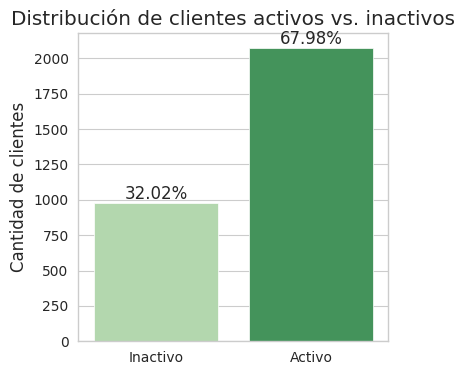

In [121]:
# Columna con etiquetas legibles
df_variables_final['ACTIVO_LABEL'] = df_variables_final['ACTIVO'].map({True: 'Activo', False: 'Inactivo'})

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df_variables_final, x='ACTIVO_LABEL', palette='Greens')
plt.title('Distribución de clientes activos vs. inactivos')
plt.xlabel('')
plt.ylabel('Cantidad de clientes')

total = len(df_variables_final)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + total*0.01, porcentaje, ha='center', fontsize=12)

plt.show()

####  *5.1.2 Distribución de clientes por zona*

<ipython-input-123-1e07d410fb6e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_top20, x='ZONA', order=orden_zonas, palette=paleta_invertida)


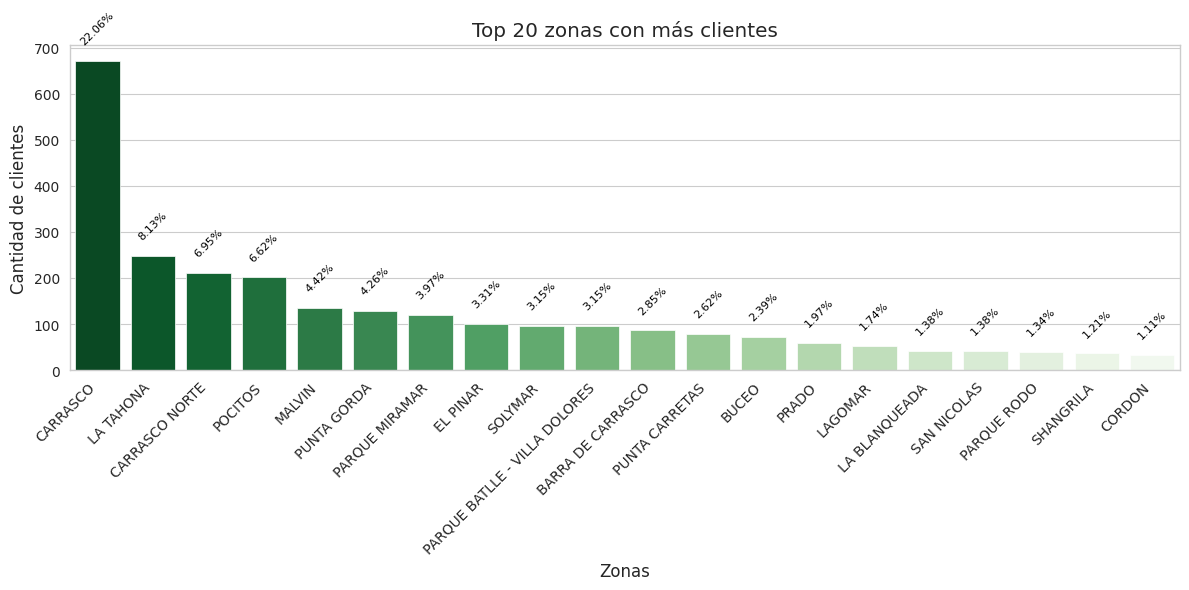

In [123]:
# Obtener los 20 valores más frecuentes de ZONA
zonas_top20 = df_variables_final['ZONA'].value_counts().nlargest(20).index

# Filtrar el DataFrame
df_top20 = df_variables_final[df_variables_final['ZONA'].isin(zonas_top20)]

# Reordenar los ejes en el gráfico
orden_zonas = df_top20['ZONA'].value_counts().index

# Crear paleta invertida (de oscuro a claro)
paleta_invertida = sns.color_palette('Greens', n_colors=20)[::-1]

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top20, x='ZONA', order=orden_zonas, palette=paleta_invertida)

plt.title('Top 20 zonas con más clientes')
plt.xlabel('Zonas')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')

total = len(df_variables_final)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + total * 0.01
    ax.text(
        x, y, porcentaje,
        ha='center', va='bottom', fontsize=8,
        rotation=45,
        color='black'
    )

plt.tight_layout()
plt.show()

####  *5.1.3 Distribución de la cantidad de compras por cliente*

In [110]:
# Cálculo del IQR
q1 = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.25)
q3 = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.75)
iqr = q3 - q1

# Punto donde empiezan los outliers
limite_superior = q3 + 1.5 * iqr
print(f'Outliers empiezan a partir de: {limite_superior:.2f}')


Outliers empiezan a partir de: 11.00


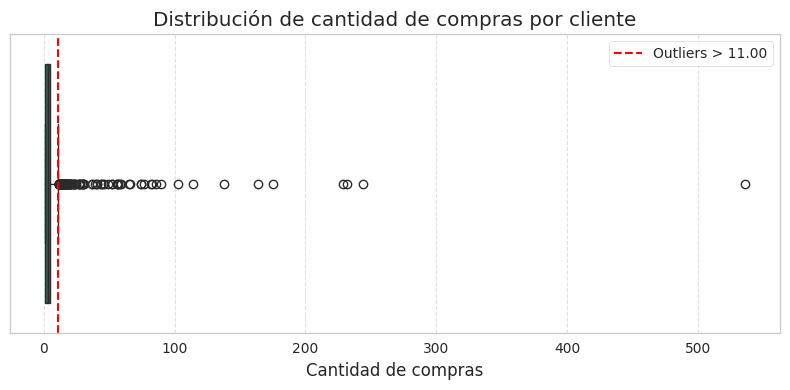

In [111]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_variables_final, x='CANTIDAD_COMPRAS', color='#276749')

# Línea vertical en el punto donde comienzan los outliers
plt.axvline(limite_superior, color='red', linestyle='--', label=f'Outliers > {limite_superior:.2f}')
plt.legend()

plt.title('Distribución de cantidad de compras por cliente')
plt.xlabel('Cantidad de compras')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


####  *5.1.4 Distribución de tipos de segmentación*

<ipython-input-156-94432184035a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)
<ipython-input-156-94432184035a>:17: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)


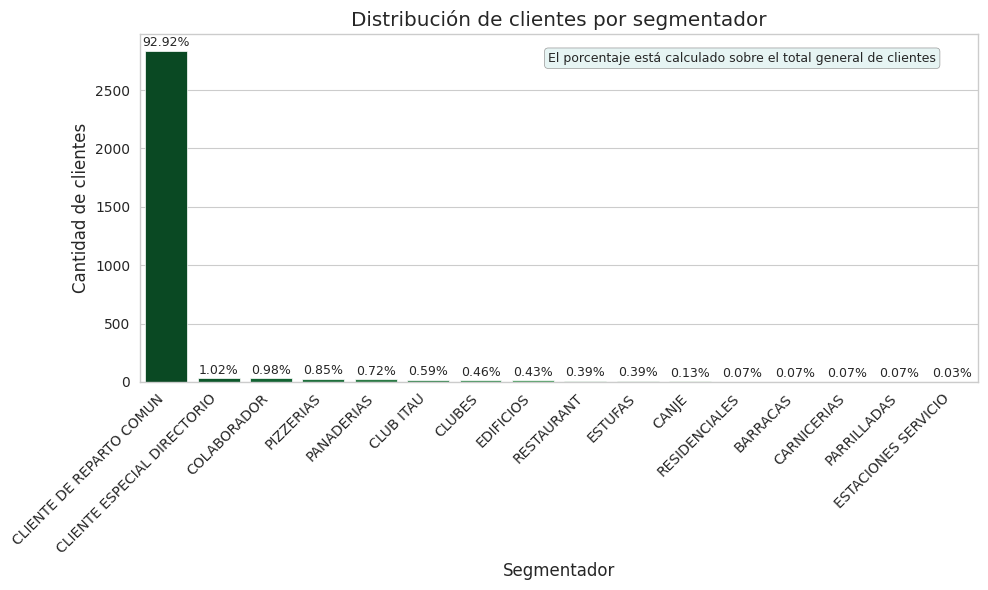

In [156]:
# Lista de segmentadores de interés
segmentadores_interes = [
    'CLIENTE DE REPARTO COMUN', 'BARRACAS', 'ESTUFAS', 'PANADERIAS',
    'COLABORADOR', 'CLIENTE ESPECIAL DIRECTORIO', 'PIZZERIAS', 'EDIFICIOS',
    'CLUBES', 'CLUB ITAU', 'RESTAURANT',  'RESIDENCIALES',
    'CANJE', 'CARNICERIAS', 'ESTACIONES SERVICIO', 'PARRILLADAS'
]

# Filtrar y contar
segmentador_filtrado = df_variables_final[df_variables_final['SEGMENTADOR'].isin(segmentadores_interes)]
segmentador_counts = segmentador_filtrado['SEGMENTADOR'].value_counts().sort_values(ascending=False)

# Total general de clientes (no solo filtrados)
total_general = len(df_variables_final)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_invertida)

plt.title('Distribución de clientes por segmentador')
plt.xlabel('Segmentador')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')

# Porcentaje basado en el total general
for i, value in enumerate(segmentador_counts.values):
    porcentaje = f'{100 * value / total_general:.2f}%'
    ax.text(i, value + total_general * 0.005, porcentaje, ha='center', va='bottom', fontsize=9)

# Cuadro de texto aclaratorio
plt.text(
    0.95, 0.95,
    'El porcentaje está calculado sobre el total general de clientes',
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='#e0f2f1', edgecolor='gray', alpha=0.8)
)

plt.tight_layout()
plt.show()

### *5.2 Análisis bivariado*

#### *5.2.1 Distribución de clientes activos vs fugados*

Tabla de porcentaje por fila:
 FUGADO      False     True 
ACTIVO                     
False   100.00000   0.00000
True     39.24783  60.75217


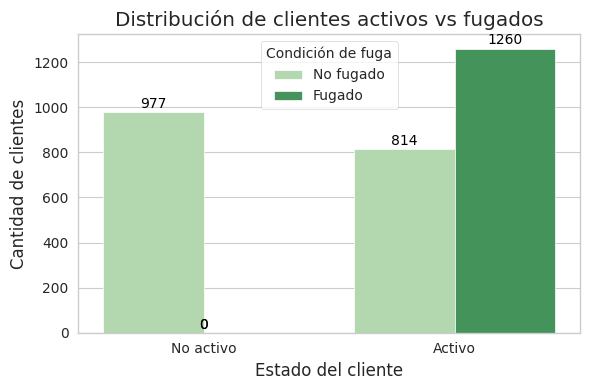

In [125]:
# Tabla de porcentaje cruzada entre ACTIVO y FUGADO
ct = pd.crosstab(ventas_fecha['ACTIVO'], ventas_fecha['FUGADO'], normalize='index') * 100
print("Tabla de porcentaje por fila:\n", ct)

plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=df_variables_final,
    x=df_variables_final['ACTIVO'].map({True: 'Activo', False: 'No activo'}),
    hue=df_variables_final['FUGADO'].map({True: 'Fugado', False: 'No fugado'}),
    palette='Greens'
)

plt.title('Distribución de clientes activos vs fugados')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Condición de fuga')

# Agregar etiquetas con el recuento encima de cada barra
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + 5,  # 5 unidades arriba de la barra para que no se superponga
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black')

plt.tight_layout()
plt.show()

#### *5.2.2 Relación entre toneladas por compra y cantidad de compras por cliente*

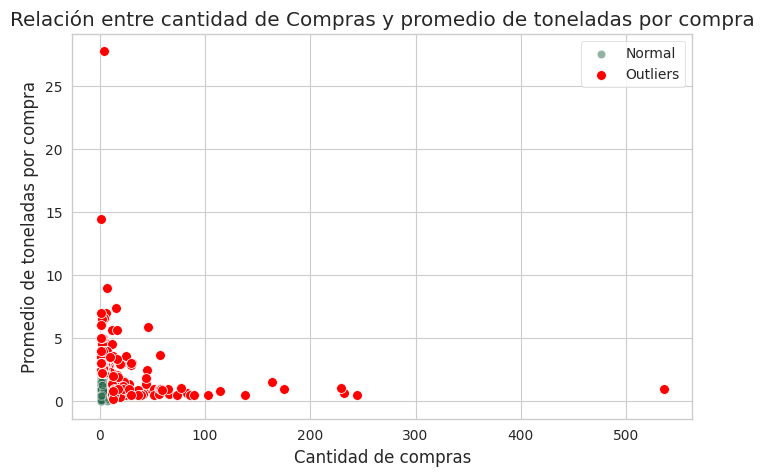

In [136]:
# Calcular los cuartiles y el IQR para cada variable
Q1_x = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.25)
Q3_x = df_variables_final['CANTIDAD_COMPRAS'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_variables_final['TONELADAS_POR_COMPRA'].quantile(0.25)
Q3_y = df_variables_final['TONELADAS_POR_COMPRA'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Definir límites para outliers
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Crear una máscara para los outliers en cualquiera de los dos ejes
outliers = ((df_variables_final['CANTIDAD_COMPRAS'] < lower_bound_x) |
            (df_variables_final['CANTIDAD_COMPRAS'] > upper_bound_x) |
            (df_variables_final['TONELADAS_POR_COMPRA'] < lower_bound_y) |
            (df_variables_final['TONELADAS_POR_COMPRA'] > upper_bound_y))

plt.figure(figsize=(8,5))
# Graficar todos los puntos normales
sns.scatterplot(data=df_variables_final[~outliers],
                x='CANTIDAD_COMPRAS', y='TONELADAS_POR_COMPRA',
                alpha=0.5, color='#276749', label='Normal')

# Graficar los outliers en otro color y tamaño
sns.scatterplot(data=df_variables_final[outliers],
                x='CANTIDAD_COMPRAS', y='TONELADAS_POR_COMPRA',
                color='red', s=50, label='Outliers')

plt.title('Relación entre cantidad de Compras y promedio de toneladas por compra')
plt.xlabel('Cantidad de compras')
plt.ylabel('Promedio de toneladas por compra')
plt.legend()
plt.show()

#### *5.2.3 Relación entre toneladas compradas y zona*

<ipython-input-149-5ebe3cc8414c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=zonas_top20.index, y=zonas_top20.values, palette=paleta_invertida)


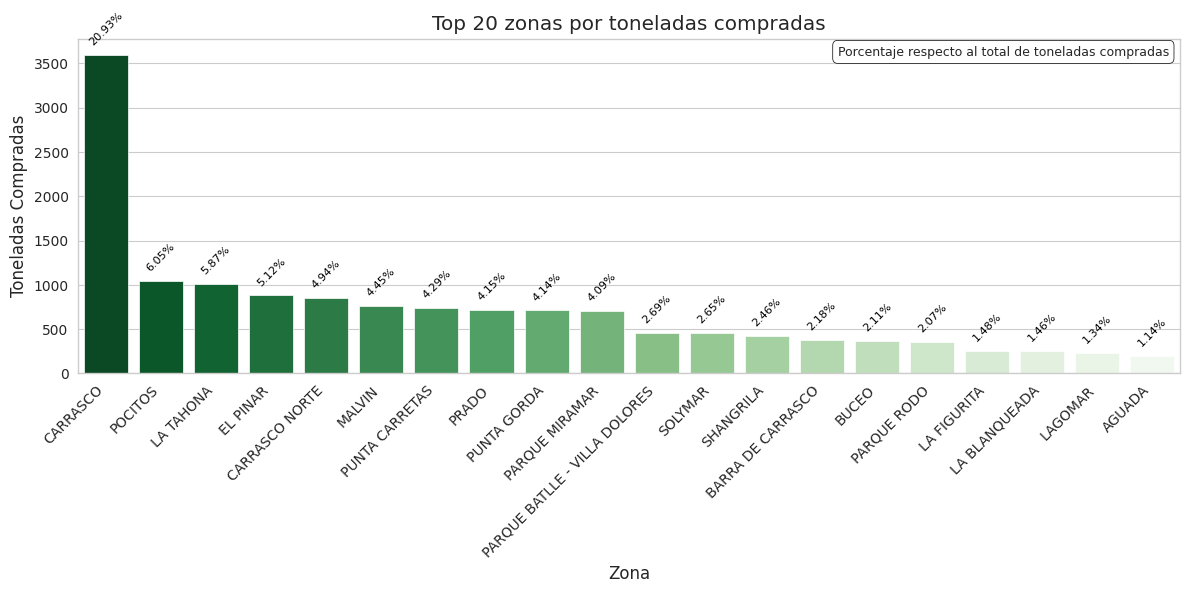

In [149]:
# Agrupar por zona y sumar toneladas compradas
zonas_toneladas = df_variables_final.groupby('ZONA')['TONELADAS_COMPRADAS'].sum()

# Ordenar de mayor a menor y tomar las primeras 20
zonas_top20 = zonas_toneladas.sort_values(ascending=False).head(20)

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(x=zonas_top20.index, y=zonas_top20.values, palette=paleta_invertida)

# Título y etiquetas
plt.title('Top 20 zonas por toneladas compradas')
plt.xlabel('Zona')
plt.ylabel('Toneladas Compradas')
plt.xticks(rotation=45, ha='right')

# Agregar porcentaje sobre cada barra (respecto del total de toneladas compradas)
total_toneladas = df_variables_final['TONELADAS_COMPRADAS'].sum()
for i, p in enumerate(ax.patches):
    porcentaje = f'{100 * p.get_height() / total_toneladas:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + total_toneladas * 0.005  # pequeño margen
    ax.text(
        x, y, porcentaje,
        ha='center', va='bottom', fontsize=8,
        rotation=45,
        color='black'
    )

# Cuadro de texto aclaratorio
plt.text(
    0.99, 0.95,
    'Porcentaje respecto al total de toneladas compradas',
    transform=plt.gca().transAxes,
    fontsize=9,
    ha='right',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()


#### *5.2.4 Cantidad de clientes fugados por segmentador*

<ipython-input-157-a8cc493cb599>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)
<ipython-input-157-a8cc493cb599>:12: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)


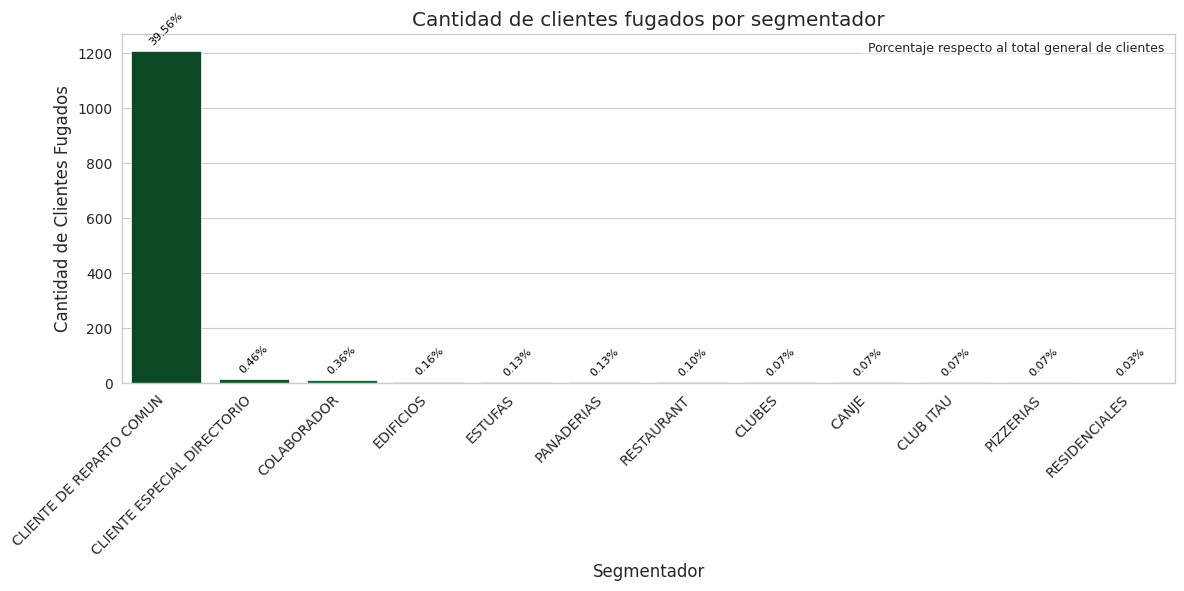

In [157]:
# Filtrar solo los clientes fugados y los segmentadores de interés
df_fugados = df_variables_final[
    (df_variables_final['FUGADO'] == True) &
    (df_variables_final['SEGMENTADOR'].isin(segmentadores_interes))
]

# Contar los clientes fugados por segmentador
fugados_segmentador_counts = df_fugados['SEGMENTADOR'].value_counts().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12,6))
ax = sns.barplot(x=fugados_segmentador_counts.index, y=fugados_segmentador_counts.values, palette=paleta_invertida)

plt.title('Cantidad de clientes fugados por segmentador')
plt.xlabel('Segmentador')
plt.ylabel('Cantidad de Clientes Fugados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra (respecto al total de clientes, no solo fugados)
total_clientes = len(df_variables_final)
for i, valor in enumerate(fugados_segmentador_counts.values):
    porcentaje = f'{100 * valor / total_clientes:.2f}%'
    ax.text(i, valor + total_clientes * 0.005, porcentaje,
            ha='center', va='bottom', fontsize=8, rotation=45, color='black')

# Aclaración sobre el porcentaje
plt.text(0.99, 0.98, 'Porcentaje respecto al total general de clientes',
         transform=plt.gca().transAxes, fontsize=9, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### *5.3 Análisis multivariado*

#### *5.3.1 Consumo de toneladas por compra según segmentador de clientes fugados*

<ipython-input-158-4ad6bb7ac51f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-158-4ad6bb7ac51f>:3: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.boxplot(


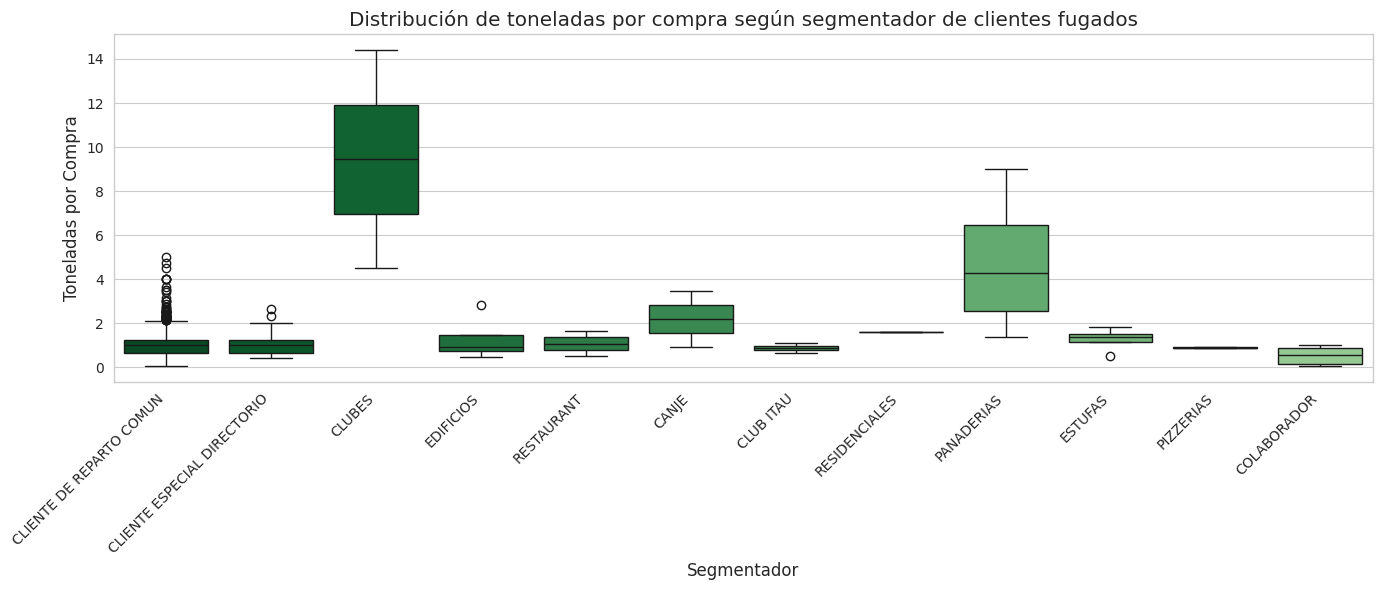

In [158]:
# Boxplot por Segmentador para clientes fugados de interés
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_fugados,
    x='SEGMENTADOR',
    y='TONELADAS_POR_COMPRA',
    palette=paleta_invertida
)

plt.title('Distribución de toneladas por compra según segmentador de clientes fugados')
plt.xlabel('Segmentador')
plt.ylabel('Toneladas por Compra')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### *5.3.2 Correlaciones de variables numéricas*

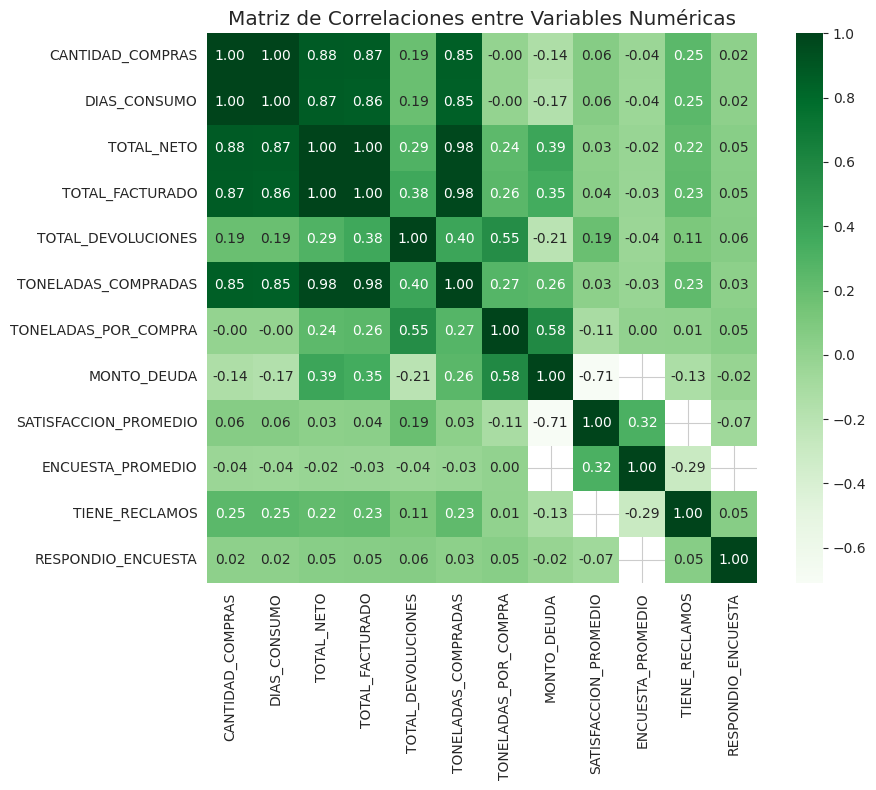

In [159]:
plt.figure(figsize=(10,8))
numericas = df_variables_final.select_dtypes(include=np.number)
sns.heatmap(numericas.corr(), annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title('Matriz de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

#### *5.3.3 Relación entre deuda y encuesta según clientes fugados*

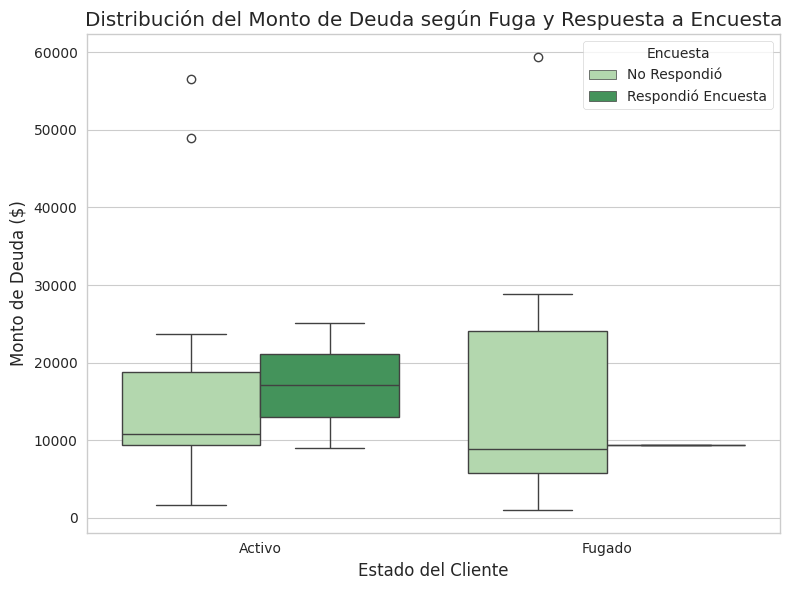

In [162]:
# Copia del DataFrame con etiquetas legibles
df_plot = df_variables_final.copy()

# Reemplazar valores booleanos por etiquetas legibles
df_plot['FUGADO'] = df_plot['FUGADO'].map({True: 'Fugado', False: 'Activo'})
df_plot['RESPONDIO_ENCUESTA'] = df_plot['RESPONDIO_ENCUESTA'].map({1: 'Respondió Encuesta', 0: 'No Respondió'})

plt.figure(figsize=(8,6))
sns.boxplot(data=df_plot, x='FUGADO', y='MONTO_DEUDA', hue='RESPONDIO_ENCUESTA', palette='Greens')
plt.title('Distribución del Monto de Deuda según Fuga y Respuesta a Encuesta')
plt.xlabel('Estado del Cliente')
plt.ylabel('Monto de Deuda ($)')
plt.legend(title='Encuesta')
plt.tight_layout()
plt.show()

#### *5.3.3 Relación entre reclamos y  según clientes fugados*

<ipython-input-169-74523c79d9f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


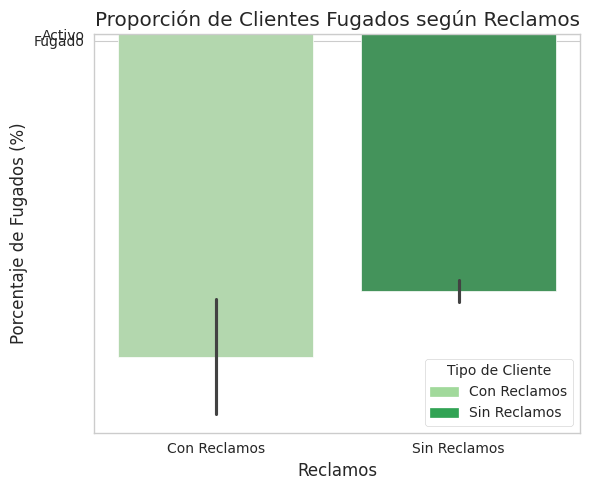

In [169]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 5))
sns.barplot(
    data=df_plot,
    x='TIENE_RECLAMOS_LABEL',
    y='FUGADO',
    estimator=lambda x: 100 * x.mean(),
    palette='Greens'
)

# Títulos y etiquetas
plt.title('Proporción de Clientes Fugados según Reclamos')
plt.ylabel('Porcentaje de Fugados (%)')
plt.xlabel('Reclamos')

plt.tight_layout()
plt.show()
